In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
titanic=pd.read_csv('titanic_train.csv')

In [245]:
    titanic.head()

,male,Q,S,Pclass,Age,SibSp,Parch,Fare
0,1,0,1,3,22.0,1,0,7.2500
1,0,0,0,1,38.0,1,0,71.2833
2,0,0,1,3,26.0,0,0,7.9250
3,0,0,1,1,35.0,1,0,53.1000
4,1,0,1,3,35.0,0,0,8.0500


In [246]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   male    891 non-null    uint8  
 1   Q       891 non-null    uint8  
 2   S       891 non-null    uint8  
 3   Pclass  891 non-null    int64  
 4   Age     891 non-null    float64
 5   SibSp   891 non-null    int64  
 6   Parch   891 non-null    int64  
 7   Fare    891 non-null    float64
dtypes: float64(2), int64(3), uint8(3)
memory usage: 37.5 KB


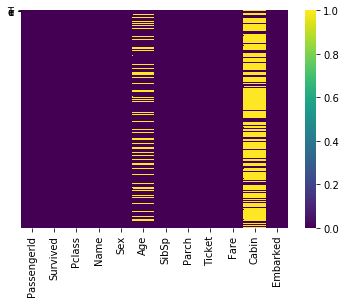

In [88]:
sns.heatmap(titanic.isnull(),cbar=True,yticklabels='True',cmap='viridis')

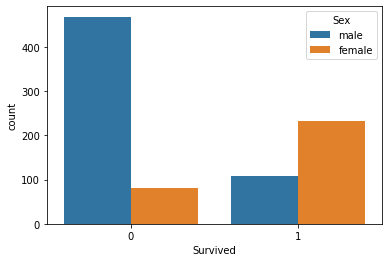

In [89]:
sns.countplot(x=titanic['Survived'],hue=titanic.Sex)

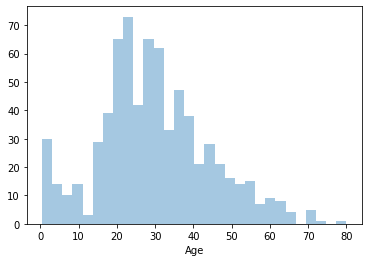

In [90]:
sns.distplot(titanic['Age'].dropna(),kde=False,bins=30)

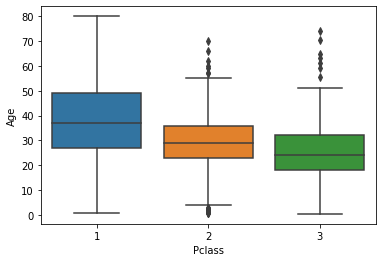

In [91]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

In [92]:
def fill_age(col):
    age_col=col[0]
    class_col=col[1]
    if pd.isnull(age_col):
        if class_col==1:
            return 50
        elif class_col==2:
            return 35
        else:
            return 20
    else:
        return age_col


In [93]:
titanic['Age']=titanic[['Age','Pclass']].apply(fill_age,axis=1)

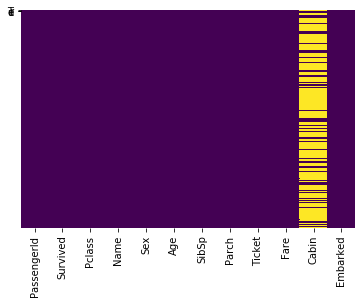

In [94]:
sns.heatmap(titanic.isnull(),cbar=False,yticklabels='True',cmap='viridis')

In [95]:
titanic.drop(['Ticket','Name'],axis=1,inplace=True)

In [96]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,20.0,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [97]:
sex_dum=pd.get_dummies(titanic['Sex'],drop_first=True)

In [98]:
em_dum=pd.get_dummies(titanic['Embarked'],drop_first=True)

In [99]:
titanic=pd.concat([sex_dum,em_dum,titanic],axis=1)

In [100]:
titanic.drop(['Cabin'],axis=1,inplace=True)

In [101]:
titanic=titanic.drop('Sex',axis=1)

In [103]:
titanic=titanic.drop('Embarked',axis=1)

In [105]:
titanic=titanic.drop('PassengerId',axis=1)


In [111]:
y=titanic['Survived']
x=titanic.drop('Survived',axis=1,inplace=True)

KeyError: 'Survived'

In [120]:
x=titanic
x

,male,Q,S,Pclass,Age,SibSp,Parch,Fare
0,1,0,1,3,22.0,1,0,7.2500
1,0,0,0,1,38.0,1,0,71.2833
2,0,0,1,3,26.0,0,0,7.9250
3,0,0,1,1,35.0,1,0,53.1000
4,1,0,1,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
886,1,0,1,2,27.0,0,0,13.0000
887,0,0,1,1,19.0,0,0,30.0000
888,0,0,1,3,20.0,1,2,23.4500
889,1,0,0,1,26.0,0,0,30.0000


In [121]:
from sklearn.model_selection import train_test_split

In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.30,random_state=101)

In [123]:
from sklearn.linear_model import LogisticRegression

In [124]:
logmodl=LogisticRegression()

In [125]:
logmodl.fit(x_train,y_train)

C:\Users\SaurabhSaxena\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [126]:
predictions = logmodl.predict(x_test)

In [127]:
from sklearn.metrics import classification_report

In [128]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.68      0.73       114

    accuracy                           0.79       268
   macro avg       0.79      0.77      0.78       268
weighted avg       0.79      0.79      0.78       268



In [129]:
from sklearn.metrics import confusion_matrix

In [132]:
confusion_matrix(y_test,predictions)

array([[134,  20],
       [ 37,  77]], dtype=int64)

In [308]:
test=pd.read_csv('titanic_test.csv')

In [309]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [310]:
def fill_age(col):
    age_col=col[0]
    class_col=col[1]
    if pd.isnull(age_col):
        if class_col==1:
            return 50
        elif class_col==2:
            return 35
        else:
            return 20
    else:
        return age_col

In [311]:
test['Age']=test[['Age','Pclass']].apply(fill_age,axis=1)

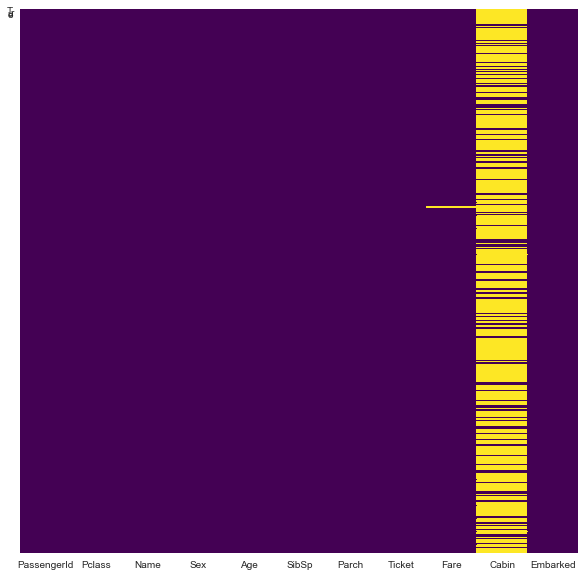

In [312]:
sns.heatmap(test.isnull(),cbar=False,yticklabels='True',cmap='viridis')

In [313]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,20.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,20.0,0,0,359309,8.0500,NaN,S


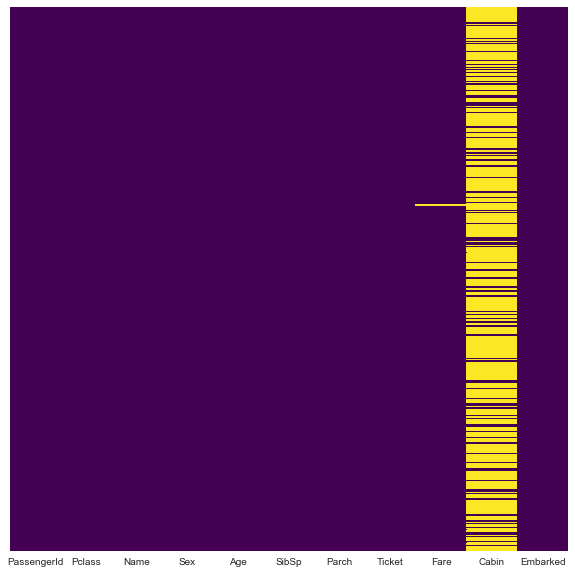

In [314]:
sns.set_style('whitegrid')
plt.rcParams["figure.figsize"] = (10,10)
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

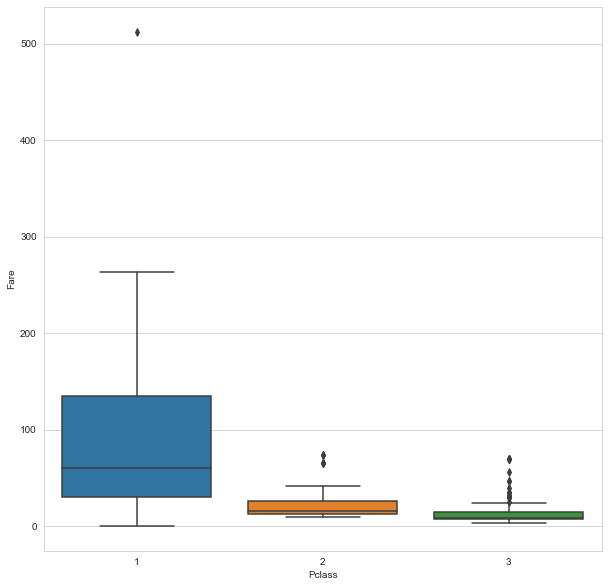

In [343]:
sns.boxplot(x='Pclass',y='Fare',data=test)

In [357]:
test[['Age','Pclass','Fare']]

,Age,Pclass,Fare
0,34.5,3,7.8292
1,47.0,3,7.0000
2,62.0,2,9.6875
3,27.0,3,8.6625
4,22.0,3,12.2875
...,...,...,...
413,20.0,3,8.0500
414,39.0,1,108.9000
415,38.5,3,7.2500
416,20.0,3,8.0500


C:\Users\SaurabhSaxena\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


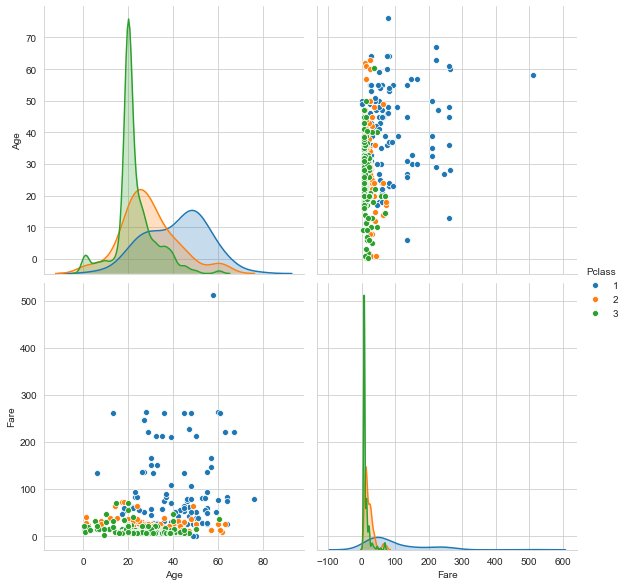

In [368]:
#test[test['Fare'].isnull()]
sns.pairplot(test[['Age','Pclass','Fare']],size=4,hue='Pclass')

In [364]:
#test.fillna(test.Fare.mean,inplace=True)
test['Fare'].filna

AttributeError: 'Series' object has no attribute 'filna'

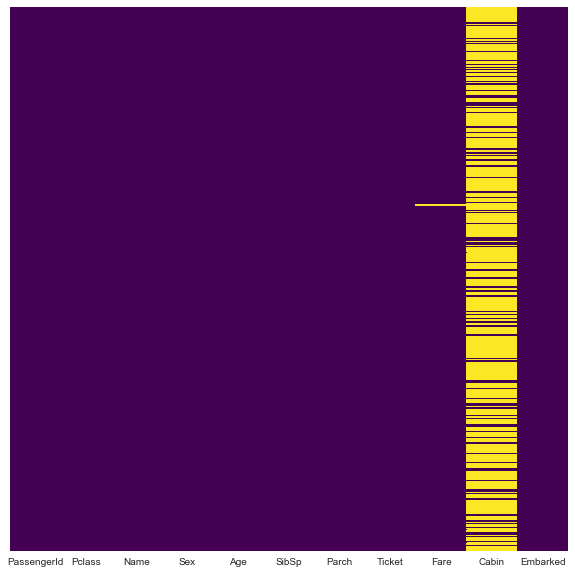

In [317]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [318]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,20.0,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,20.0,0,0,359309,8.0500,NaN,S


In [319]:
sex_dum=pd.get_dummies(test['Sex'],drop_first=True)

In [320]:
em_dum=pd.get_dummies(test['Embarked'],drop_first=True)

In [321]:
test=pd.concat([sex_dum,em_dum,test],axis=1)

In [322]:
test.drop(['Cabin'],axis=1,inplace=True)

In [323]:
test=test.drop('Sex',axis=1)
test=test.drop('PassengerId',axis=1)

In [324]:

test=test.drop('Embarked',axis=1)

In [338]:
test=test.drop('Name',axis=1)

In [339]:
test

,male,Q,S,Pclass,Age,SibSp,Parch,Fare
0,1,1,0,3,34.5,0,0,7.8292
1,0,0,1,3,47.0,1,0,7.0000
2,1,1,0,2,62.0,0,0,9.6875
3,1,0,1,3,27.0,0,0,8.6625
4,0,0,1,3,22.0,1,1,12.2875
...,...,...,...,...,...,...,...,...
413,1,0,1,3,20.0,0,0,8.0500
414,0,0,0,1,39.0,0,0,108.9000
415,1,0,1,3,38.5,0,0,7.2500
416,1,0,1,3,20.0,0,0,8.0500


In [327]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   male    418 non-null    uint8  
 1   Q       418 non-null    uint8  
 2   S       418 non-null    uint8  
 3   Pclass  418 non-null    int64  
 4   Name    418 non-null    object 
 5   Age     418 non-null    float64
 6   SibSp   418 non-null    int64  
 7   Parch   418 non-null    int64  
 8   Fare    417 non-null    float64
dtypes: float64(2), int64(3), object(1), uint8(3)
memory usage: 20.9+ KB


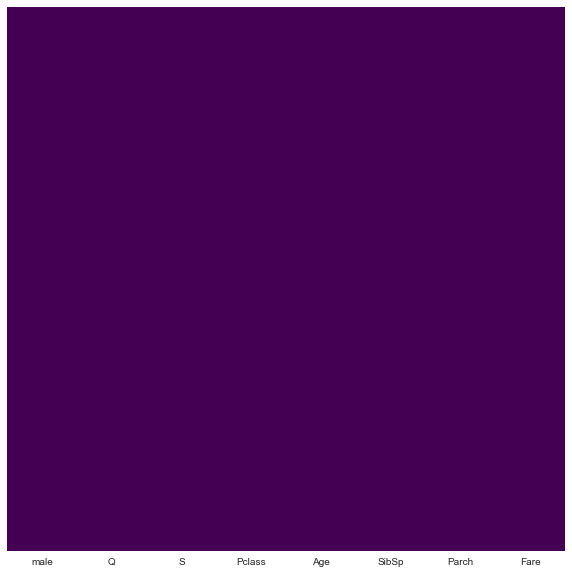

In [340]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [335]:
test.Fare=test.Fare.fillna(35.8)

In [336]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   male    418 non-null    uint8  
 1   Q       418 non-null    uint8  
 2   S       418 non-null    uint8  
 3   Pclass  418 non-null    int64  
 4   Name    418 non-null    object 
 5   Age     418 non-null    float64
 6   SibSp   418 non-null    int64  
 7   Parch   418 non-null    int64  
 8   Fare    418 non-null    float64
dtypes: float64(2), int64(3), object(1), uint8(3)
memory usage: 20.9+ KB


In [341]:
predictions = logmodl.predict(test)

In [342]:
print(classification_report(y_test,predictions))

ValueError: Found input variables with inconsistent numbers of samples: [268, 418]